In [19]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [20]:
# # !pip install yfinance==0.1.67
# #!pip install pandas==1.3.3
# !pip install requests==2.26.0
# #!pip install plotly==5.3.1
# !pip install html5lib

# For Tesla 

## Question 1: Use yfinance to Extract Stock Data

In [21]:
tesla=yf.Ticker('TSLA')

In [22]:
tesla_data=tesla.history(period="max")

In [23]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

In [24]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Python-Requests/2.26.0"}
html_data = requests.get(url, headers=headers)
soup = BeautifulSoup(html_data.text, "html.parser")
# Find all tables on the webpage
tables = soup.find_all("table")
# Initialize DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
# Iterate over tables to find the one with "Tesla Quarterly Revenue"
table_found = False
for index, table in enumerate(tables):
    if "Tesla Quarterly Revenue" in table.text:
        table_index = index
        table_found = True
        break
# Check if the table was found
if table_found:
    # Extract data from the identified table
    rows = tables[table_index].find_all('tr')    
    # Prepare a list to collect row data
    data = []
    # Iterate over rows and extract columns
    for row in rows:
        cols = row.find_all("td")
        if cols:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            data.append({"Date": date, "Revenue": revenue})
        # Convert list of data to DataFrame
    tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

In [25]:
tesla_revenue.head()

,Date,Revenue
0,2024-03-31,21301
1,2023-12-31,25167
2,2023-09-30,23350
3,2023-06-30,24927
4,2023-03-31,23329


In [27]:
tesla_revenue.tail()

,Date,Revenue
55,2010-06-30,28
56,2010-03-31,21
57,2009-12-31,
58,2009-09-30,46
59,2009-06-30,27


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(tesla_data, tesla_revenue,ttl):
    # Convert 'Date' columns to datetime format
    tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
    tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
    
    # Sort by date to ensure data is plotted correctly
    tesla_data = tesla_data.sort_values(by='Date')
    tesla_revenue = tesla_revenue.sort_values(by='Date')
    
    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plotting Tesla stock data on primary y-axis
    ax1.plot(tesla_data['Date'], tesla_data['Close'], color='b', label='Tesla Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price ($)', color='b')
        # Creating secondary y-axis for revenue
    ax2 = ax1.twinx()
    ax2.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='g', label='Tesla Revenue')
    ax2.set_ylabel('Revenue ($ millions)', color='g')
    # Title and legend
    plt.title(ttl)
    fig.tight_layout()
    # Adding legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
    plt.show()


## Question 3: Use yfinance to Extract Stock Data

In [28]:
gmestop=yf.Ticker("GME")

In [29]:
gme_data=gmestop.history(period="max")

In [30]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,2.40625,2.51500,2.38125,2.51250,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,2.54375,2.54875,2.48125,2.50000,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,2.50000,2.50625,2.46250,2.48750,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,2.47500,2.47500,2.34375,2.38750,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,2.40000,2.46875,2.38125,2.46875,6892800,0.0,0.0


In [31]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Python-Requests/2.26.0"}
html_data = requests.get(url, headers=headers)
soup = BeautifulSoup(html_data.text, "html.parser")
# Find all tables on the webpage
tables = soup.find_all("table")
# Initialize DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
# Iterate over tables to find the one with "Tesla Quarterly Revenue"
table_found = False
for index, table in enumerate(tables):
    if "GameStop Quarterly Revenue" in table.text:
        table_index = index
        table_found = True
        break
# Check if the table was found
if table_found:
    # Extract data from the identified table
    rows = tables[table_index].find_all('tr')    
    # Prepare a list to collect row data
    data = []
    # Iterate over rows and extract columns
    for row in rows:
        cols = row.find_all("td")
        if cols:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            data.append({"Date": date, "Revenue": revenue})    
    # Convert list of data to DataFrame
    gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

In [32]:
gme_revenue.tail()

,Date,Revenue
57,2010-01-31,3524
58,2009-10-31,1835
59,2009-07-31,1739
60,2009-04-30,1981
61,2009-01-31,3492


## Make Graph

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(tesla_data, tesla_revenue,ttl):
    # Convert 'Date' columns to datetime format
    tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
    tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
    
    # Sort by date to ensure data is plotted correctly
    tesla_data = tesla_data.sort_values(by='Date')
    tesla_revenue = tesla_revenue.sort_values(by='Date')
    
    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plotting Tesla stock data on primary y-axis
    ax1.plot(tesla_data['Date'], tesla_data['Close'], color='b', label='Tesla Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price ($)', color='b')
        # Creating secondary y-axis for revenue
    ax2 = ax1.twinx()
    ax2.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='g', label='Tesla Revenue')
    ax2.set_ylabel('Revenue ($ millions)', color='g')
    # Title and legend
    plt.title(ttl)
    fig.tight_layout()
    # Adding legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
    plt.show()


## For Tesla

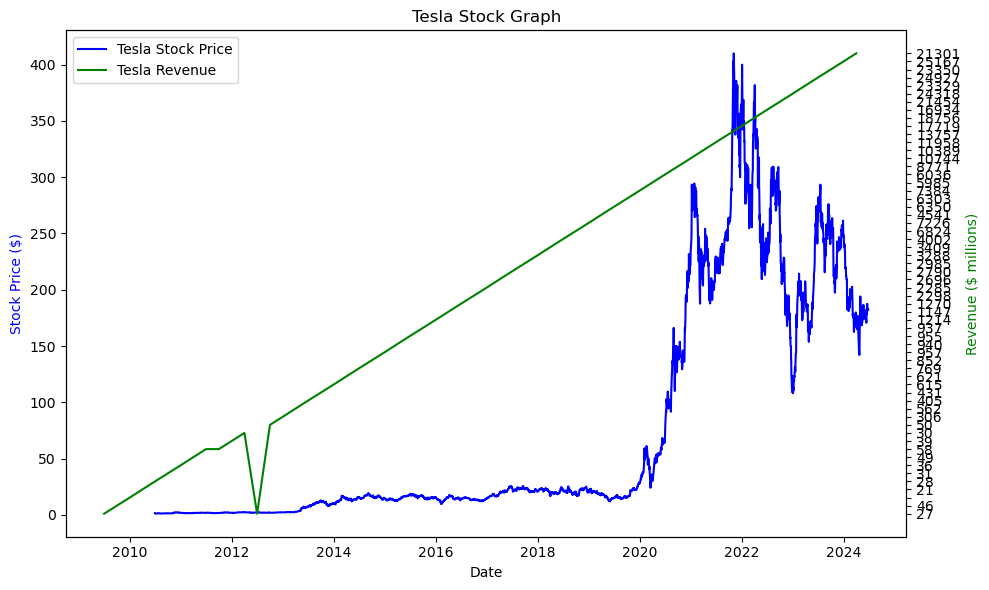

In [34]:
make_graph(tesla_data,tesla_revenue,'Tesla Stock Graph')

## For GME

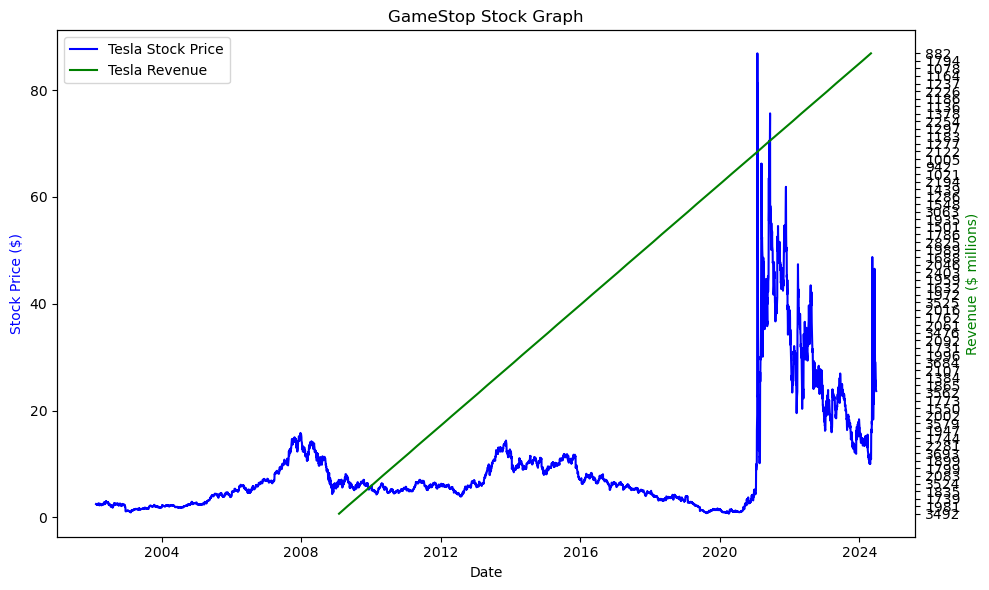

In [35]:
make_graph(gme_data,gme_revenue,'GameStop Stock Graph')